In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Models & Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:15
   ---------------------------------------- 0.4/150.0 MB 2.8 MB/s eta 0:00:55
   ---------------------------------------- 1.0/150.0 MB 4.9 MB/s eta 0:00:31
   ---------------------------------------- 1.5/150.0 MB 6.1 MB/s eta 0:00:25
    --------------------------------------- 2.1/150.0 MB 7.3 MB/s eta 0:00:21
    --------------------------------------- 2.7/150.0 MB 7.8 MB/s eta 0:00:19
    --------------------------------------- 3.2/150.0 MB 8.2 MB/s eta 0:00:18
   - -------------------------------------- 3.9/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 4.7/150.0 MB 9.7 MB/s eta 0:00:16
   - -------------------------------------- 5.4/150.0 MB 10.1 MB/s eta 0:00:

In [43]:
# Load dataset
df = pd.read_csv("Addmision_predict.csv")
df.drop(columns=['Serial No.'], inplace=True)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
# Features and Target
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

In [27]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2 Score': r2}

In [45]:
# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T
print(results_df)

                              RMSE  R2 Score
Linear Regression         0.067949  0.821208
Decision Tree             0.097333  0.633133
Random Forest             0.070669  0.806608
Support Vector Regressor  0.097112  0.634801
XGBoost                   0.077796  0.765631


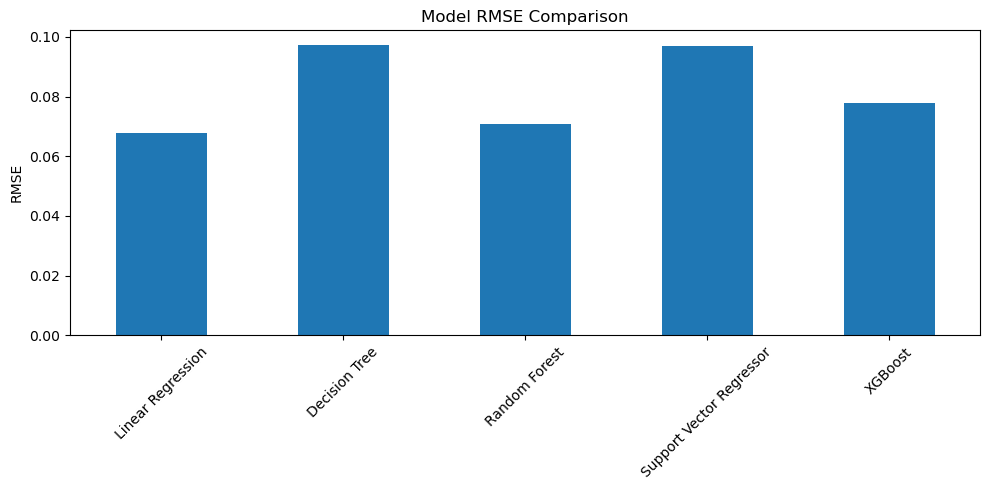

In [31]:

# Visualization
results_df[['RMSE']].plot(kind='bar', figsize=(10,5), title="Model RMSE Comparison", legend=False)
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Optional: Predict using best model
best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]
sample_input = [[330, 115, 5, 4.5, 4.5, 9.8, 1]]  # Example GRE, TOEFL, Ratings, etc.
predicted_chance = best_model.predict(sample_input)
print(f"Predicted Chance of Admission (using {best_model_name}): {predicted_chance[0]:.2f}")


Predicted Chance of Admission (using Linear Regression): 0.95


C:\Users\chaud\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
